<a href="https://colab.research.google.com/github/valmyr/CIRCUITOS-I/blob/main/Exerc_02_circuitos_i_3_unidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2)

In [ ]:
#https://tinyurl.com/2fx7kztl
import sys
import os
if(os.path.isdir(r'/content/ElectricCircuits/Jupyter notebooks/') == False):
    sys.path.insert(0, '/content/ElectricCircuits/Jupyter notebooks/')
    !git clone https://github.com/edsonportosilva/ElectricCircuits.git

In [ ]:
import sympy as sp
import numpy as np
from matplotlib.pyplot import plot as plt
from utils import round_expr, symdisp, symplot
from sympy.polys.partfrac import apart
bt = np.arange(-0.1,1,(10**-6)/10)

In [ ]:
sp.init_printing()
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.re(sp.inverse_laplace_transform(F, s, t, noconds=True))

# funções para auxílio na expansão em frações parciais
def adjustCoeff(expr):    
    coeff = expr.as_numer_denom()
    c0 = sp.poly(coeff[1].cancel()).coeffs()[0]
    
    return (coeff[0].cancel()/c0)/(coeff[1].cancel()/c0)

def partFrac(expr, Ndigits):
    expr = expr.cancel()
    expr = apart(adjustCoeff(expr), s, full=True).doit()
    
    return sp.N(expr, Ndigits)


In [ ]:
matricula = [1,1,0]
R1 = matricula[0]+1
R2 = matricula[1]+1
R3 = matricula[2]+1
print(f'R1 = {R1} ohms.')
print(f'R2 = {R2} ohms.')
print(f'R3 = {R3} ohms.')

R1 = 2 ohms.
R2 = 2 ohms.
R3 = 1 ohms.


In [ ]:
I1,IL,IC,Vx,Vx_,Vx__,Vc_,Vc__,V1,V2,s,t = sp.symbols('I_1,I_L,I_C,V_x,Vx_,V_x_,V_c_,V__c_,V_1,V_2,s,t')
I1 = (V1 - s*Vx)/(0.5*(s**2))
IL = Vx/(2*R1+0.5*s).simplify()
IC = (s*Vx-V2)/4000

In [ ]:
Eq = sp.Eq(I1,IL+IC)

In [ ]:
#Contribuição de V1
sol = sp.solve(Eq.subs({V1:20,V2:0}),Vx,dict=True)[0]
Vx_ = sol[Vx]
IL_ = IL.subs({Vx:Vx_})
Vc_ = (IC*(4000/s)).subs({Vx:Vx_,V1:20,V2:0}).simplify()

In [ ]:
symdisp("Vc'_{}(s) = ",Vc_,'Vs')

<IPython.core.display.Math object>

In [ ]:
symdisp("IL'_{}(s) = ",IL_,'As')

<IPython.core.display.Math object>

In [ ]:
#Contribuição de V2
sol = sp.solve(Eq.subs({V1:0,V2:10}),Vx,dict=True)[0]
Vx__ = sol[Vx]
IL__ = IL.subs({Vx:Vx__,V1:0,V2:10}).simplify()
Vc__ = (IC*(4000/s)).subs({Vx:Vx__,V1:0,V2:10}).simplify()

In [ ]:
symdisp("Vc''_{}(s) = ",Vc__,'Vs')

<IPython.core.display.Math object>

In [ ]:
symdisp("IL''_{}(s) = ",IL__,'Vs')

<IPython.core.display.Math object>

In [ ]:
symdisp("Vx_{'}(s) = ",Vx_,'Vs')
symdisp("Vx_{''}(s) = ",Vx__,'Vs')
symdisp('Vx(s) = ',(Vx__+Vx_).expand().simplify(),'Vs')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
#Assim, Vc = Vc_+Vc__ e IL = IL_+IL__.
VC = (Vc_ + Vc__).simplify()
IL = (IL_+IL__).simplify()

In [ ]:
symdisp('VC(s) = ',VC,'Vs')

<IPython.core.display.Math object>

In [ ]:
symdisp('IL(s) = ',IL,'As')

<IPython.core.display.Math object>

In [ ]:
vC = (10 - 10*sp.exp(-4*t) + sp.exp(-2*t)*(-2.006*10**-5*sp.cos(126.41*t) -.316*sp.sin(126.41*t)))*sp.Heaviside(t) 
iL = (5 -5*sp.exp(-4*t) + sp.exp(-2*t)*(0.004999*sp.cos(126.41*t) - 0.00023771*sp.sin(126.41*t)))*sp.Heaviside(t)

<IPython.core.display.Math object>

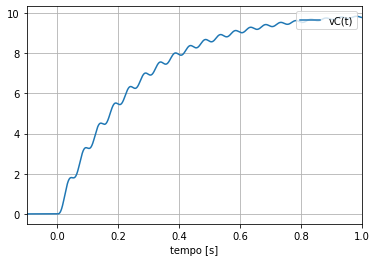

In [ ]:
symdisp('vC = ',vC,'V')
symplot(t,vC,bt,'vC(t)')

<IPython.core.display.Math object>

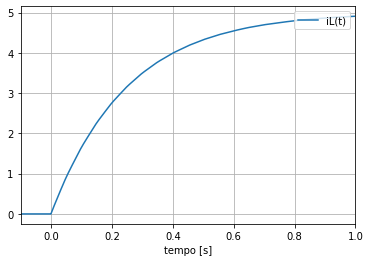

In [ ]:
symdisp('iL(t) = ',iL,'A')
symplot(t,iL,bt,'iL(t)')

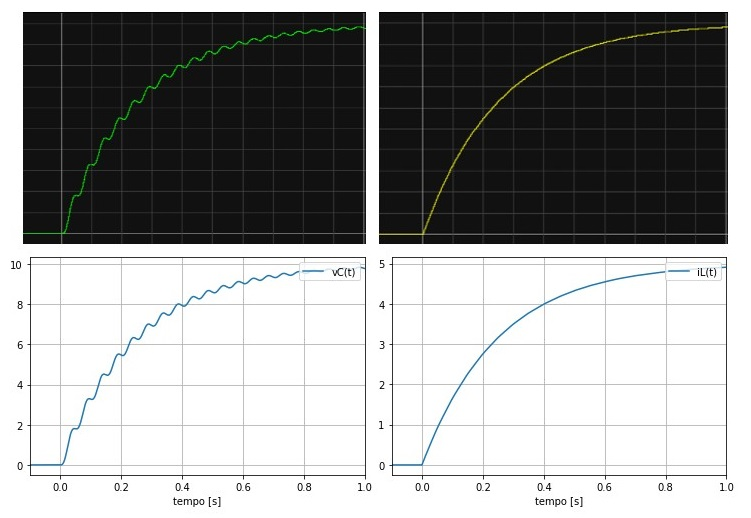

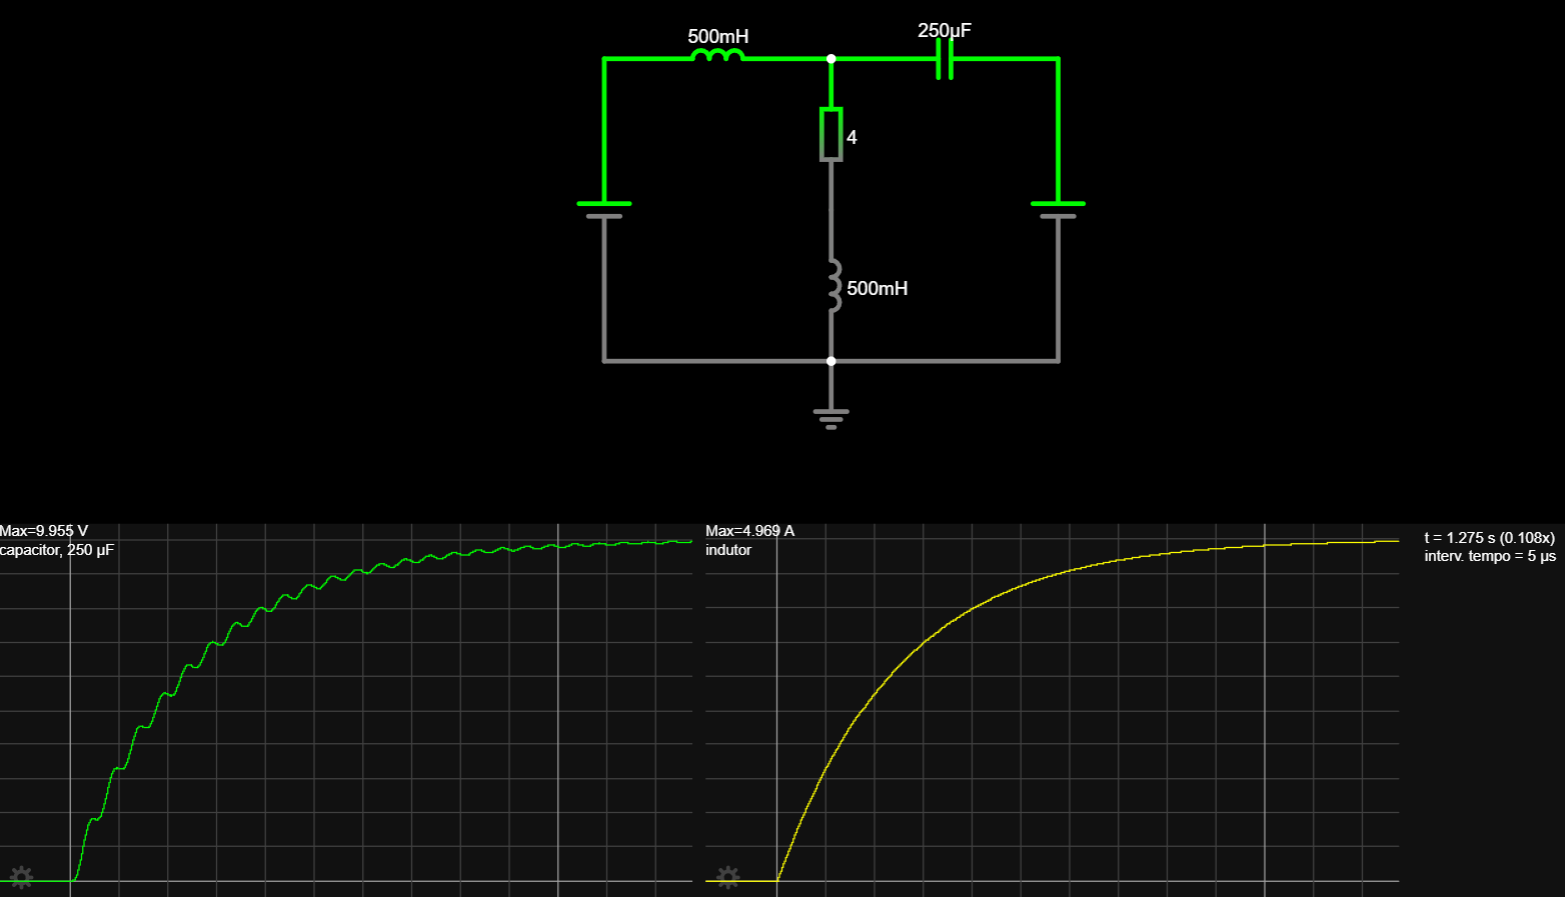